In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from data_preparation import PoseDataset
from models import *
import pdb
import matplotlib.pyplot as plt
from pathlib import Path
from pipeline import Trainer
import json

In [3]:
trainer = Trainer('config_folder/resnet50.yaml')

In [4]:
model, history = trainer.train()

Training baselines.ResNet50 with parameters:
None
Dayo


AttributeError: 'NoneType' object has no attribute 'backward'

In [ ]:
# Runs all configs
configs_path = Path('config_folder')
for conf in configs_path.iterdir():
    if conf.is_file():
        trainer = Trainer(conf)
        trainer.train()

In [ ]:
with open('experiments/VGG16_20250520_155837/history.json', 'r') as file:
    history = json.load(file)
    plt.plot(history['train_loss'], label='Training loss')
    plt.plot(history['val_loss'], label='Validation loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

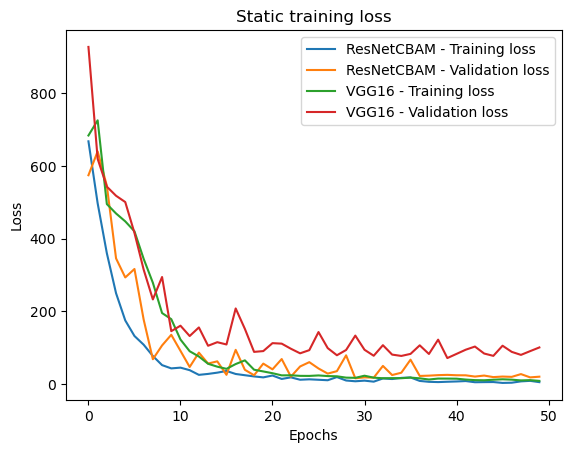

In [8]:
# Static loss function
with open('experiments/ResNetCBAM_20250521_205217/history.json', 'r') as file:
    history = json.load(file)
    plt.plot(history['train_loss'], label='ResNetCBAM - Training loss')
    plt.plot(history['val_loss'], label='ResNetCBAM - Validation loss')
with open('experiments/VGG16_20250520_155837/history.json', 'r') as file:
    history = json.load(file)
    plt.plot(history['train_loss'], label='VGG16 - Training loss')
    plt.plot(history['val_loss'], label='VGG16 - Validation loss')

plt.title("Static training loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()